In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
np.random.seed(42)

rows = 1000

data = {
    "employee_id": np.random.randint(1000, 1100, rows),
    "work_hours": np.random.normal(8, 2, rows).clip(4, 14),
    "tasks_completed": np.random.randint(3, 15, rows),
    "tasks_pending": np.random.randint(0, 10, rows),
    "overtime_hours": np.random.randint(0, 4, rows),
    "breaks_count": np.random.randint(0, 5, rows),
    "after_hours_work": np.random.choice([0, 1], rows)
}

df = pd.DataFrame(data)

def label_burnout(row):
    if row['work_hours'] > 10 and row['overtime_hours'] > 2 and row['breaks_count'] <= 1:
        return 'High'
    elif row['work_hours'] > 8:
        return 'Medium'
    else:
        return 'Low'

df['burnout_label'] = df.apply(label_burnout, axis=1)

df.head()


,employee_id,work_hours,tasks_completed,tasks_pending,overtime_hours,breaks_count,after_hours_work,burnout_label
0,1051,11.046248,12,3,0,3,1,Medium
1,1092,9.077820,9,4,0,2,0,Medium
2,1014,5.925508,6,7,3,1,0,Low
3,1071,7.619323,6,5,2,4,1,Low
4,1060,6.248763,10,3,2,0,1,Low


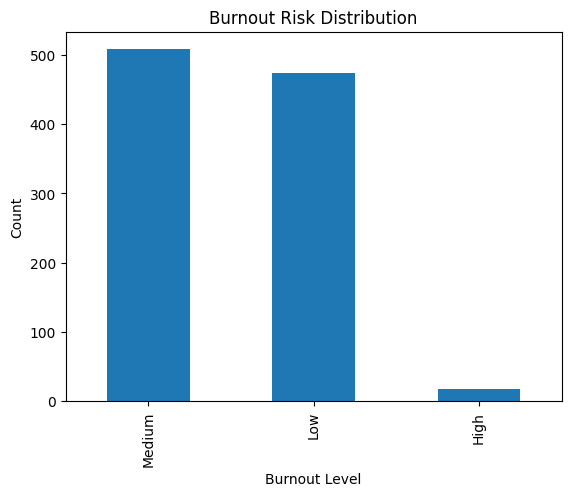

In [ ]:
df['burnout_label'].value_counts().plot(kind='bar')
plt.title("Burnout Risk Distribution")
plt.xlabel("Burnout Level")
plt.ylabel("Count")
plt.show()


In [ ]:
df['task_completion_rate'] = df['tasks_completed'] / (
    df['tasks_completed'] + df['tasks_pending'] + 1
)

df['workload_score'] = (
    df['work_hours'] * 0.4 +
    df['overtime_hours'] * 0.3 +
    (1 - df['breaks_count'] / 5) * 0.3
)

df.head()


,employee_id,work_hours,tasks_completed,tasks_pending,overtime_hours,breaks_count,after_hours_work,burnout_label,task_completion_rate,workload_score
0,1051,11.046248,12,3,0,3,1,Medium,0.750000,4.538499
1,1092,9.077820,9,4,0,2,0,Medium,0.642857,3.811128
2,1014,5.925508,6,7,3,1,0,Low,0.428571,3.510203
3,1071,7.619323,6,5,2,4,1,Low,0.500000,3.707729
4,1060,6.248763,10,3,2,0,1,Low,0.714286,3.399505


In [ ]:
X = df[['work_hours', 'overtime_hours', 'breaks_count',
        'task_completion_rate', 'workload_score']]

y = df['burnout_label']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         5
         Low       1.00      1.00      1.00        96
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



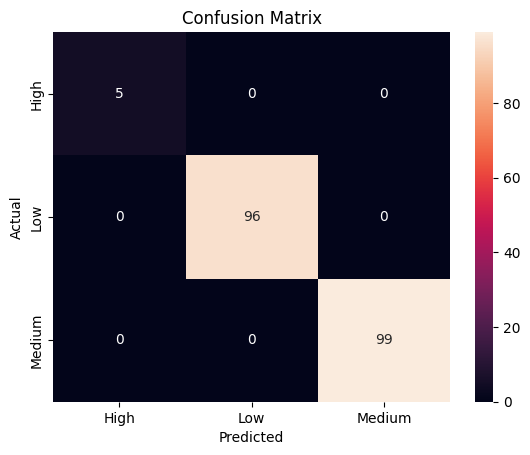

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


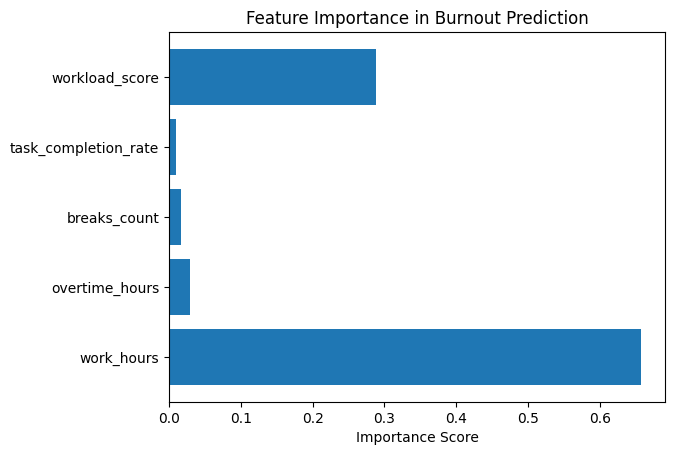

In [ ]:
importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance in Burnout Prediction")
plt.show()


In [ ]:
sample_employee = pd.DataFrame([{
    "work_hours": 9.5,
    "overtime_hours": 2,
    "breaks_count": 1,
    "task_completion_rate": 0.6,
    "workload_score": 7.1
}])

prediction = model.predict(sample_employee)
print("Predicted Burnout Risk:",
      encoder.inverse_transform(prediction)[0])


Predicted Burnout Risk: Medium


In [ ]:
import joblib

joblib.dump(model, "burnout_model.pkl")
joblib.dump(encoder, "label_encoder.pkl")


['label_encoder.pkl']

In [ ]:
import joblib
import pandas as pd

# Load saved model
model = joblib.load("burnout_model.pkl")
encoder = joblib.load("label_encoder.pkl")


In [ ]:
np.random.seed(101)

new_data = pd.DataFrame({
    "work_hours": np.random.uniform(6, 12, 50),
    "overtime_hours": np.random.randint(0, 4, 50),
    "breaks_count": np.random.randint(0, 5, 50),
    "task_completion_rate": np.random.uniform(0.3, 1.0, 50),
    "workload_score": np.random.uniform(5, 9, 50)
})


In [ ]:
predictions = model.predict(new_data)
new_data["burnout_label"] = encoder.inverse_transform(predictions)


In [ ]:
records = new_data.to_dict(orient="records")



In [ ]:
new_data = pd.DataFrame({
    "work_hours": [
        10.5, 11.0, 11.5, 12.0, 11.8,
        10.8, 11.2, 12.0, 11.6, 10.9,
        11.3, 12.0, 11.7, 10.6, 11.9,
        10.7, 11.4, 12.0, 11.1, 10.8
    ],
    "overtime_hours": [
        3, 3, 3, 3, 3,
        3, 3, 3, 3, 3,
        3, 3, 3, 3, 3,
        3, 3, 3, 3, 3
    ],
    "breaks_count": [
        1, 1, 0, 0, 1,
        1, 0, 0, 1, 1,
        0, 0, 1, 1, 0,
        1, 0, 0, 1, 1
    ],
    "task_completion_rate": [
        0.45, 0.40, 0.38, 0.35, 0.42,
        0.44, 0.36, 0.34, 0.39, 0.41,
        0.33, 0.32, 0.37, 0.43, 0.31,
        0.44, 0.36, 0.30, 0.40, 0.42
    ],
    "workload_score": [
        8.1, 8.3, 8.6, 8.9, 8.7,
        8.2, 8.4, 9.0, 8.5, 8.3,
        8.8, 9.1, 8.6, 8.2, 8.9,
        8.3, 8.5, 9.2, 8.4, 8.2
    ]
})


In [ ]:
!pip install supabase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 9.5 MB/s eta 0:00:00


In [ ]:
from supabase import create_client
import pandas as pd

SUPABASE_URL = "https://jkkqbexqwtjgqmqbrzyu.supabase.co"
SUPABASE_KEY = "sb_publishable_imdq6NTVDCuAFVNGRyQkEA_zZrwe0D4"

supabase = create_client(SUPABASE_URL, SUPABASE_KEY)

# Sample prediction data (from your model)
data = {
    "work_hours": 10,
    "overtime_hours": 3,
    "breaks_count": 1,
    "task_completion_rate": 0.5,
    "workload_score": 7.8,
    "burnout_label": "High"
}

supabase.table("burnout_predictions").insert(data).execute()

print("Data uploaded successfully")


Data uploaded successfully


In [ ]:
from supabase import create_client

SUPABASE_URL = "https://jkkqbexqwtjgqmqbrzyu.supabase.co"
SUPABASE_KEY = "sb_publishable_imdq6NTVDCuAFVNGRyQkEA_zZrwe0D4"

supabase = create_client(SUPABASE_URL, SUPABASE_KEY)

supabase.table("burnout_predictions").insert(records).execute()

print("New prediction data uploaded successfully")


New prediction data uploaded successfully
